Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 3ms/step
[5.1] => 1.93 (expected 1.40)
[4.9] => 1.72 (expected 1.40)
[4.7] => 1.51 (expected 1.30)
[4.6] => 1.41 (expected 1.50)
[5.0] => 1.83 (expe

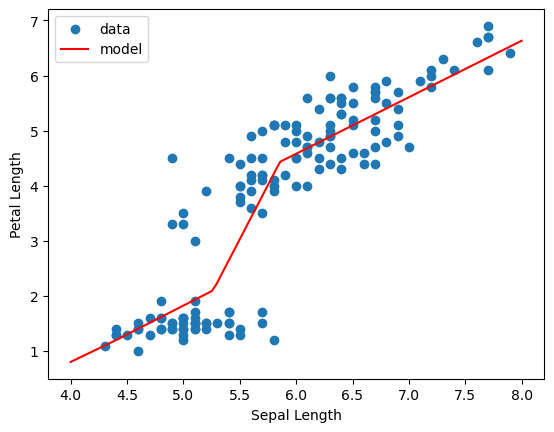

In [1]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
from sklearn import datasets

#Load dataset
#split into input (X) and output (y)
iris = datasets.load_iris()
X = iris.data[:, :1]
X = X*1.0
y = iris.data[:,2:3]
y = y*1.0

#define keras model
model = Sequential()

model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)


#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )
    
import matplotlib.pyplot as plt
number_grid = np.linspace(4, 8, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()